### Import libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Read in the display the image

In [ ]:
image = cv2.imread('girl.jpg')

# about image
print ('This image is: ', type(image), 
       ' with dimensions: ', image.shape)

print (image.shape[0])
print (image.shape[1])

In [ ]:
%matplotlib inline

image_copy = np.copy(image)

image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

### Define the color threshold

In [ ]:
# define our color selection boundary in RGB values
lower_blue = np.array([0, 0, 220])
upper_blue = np.array([50, 70, 255])

### Create a mask

In [ ]:
# Define the masked area
# mask is a common way to isolate a selected 
# area of interest and do something with it
mask = cv2.inRange(image_copy, lower_blue, upper_blue)

plt.imshow(mask, cmap='gray')

In [ ]:
# Mask the image to let the girl show through
masked_image = np.copy(image_copy)

masked_image[mask != 0] = (0, 0, 0)

plt.imshow(masked_image)

### Mask and add a background image

In [ ]:
# load a bg img, and convert it to RGB
bg_img = cv2.imread('IMAGE_NAME_OVER_HERE')
bg_img = cv2.cvtColor(bg_img, cv2.COLOR_BGR2RGB)

# crop it to the right size
crop_background = bg_image[0:image.shape[0], 0:image.shape[1]]

# mask the cropped bg so that the main image part is blocked
crop_background[mask == 0] = [0, 0, 0]

plt.imshow(crop_background)

In [ ]:
# Add the two images together to create a complete image
complete_image = crop_background + masked_image

plt.imshow(complete_image)

## Quiz: Color Threshold

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Read in the image
image = cv2.imread('stop_sign.jpg')
# Convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# ---------------------------------------------------------- #

# plt.imshow(image)

## TODO: Define the color selection criteria
lower_red = np.array([150,0,0]) 
upper_red = np.array([255,200,200])

# Mask the image 
masked_image = np.copy(image)
mask = cv2.inRange(masked_image, lower_red, upper_red)
# plt.imshow(mask)
## TODO: Apply the mask to masked_image
## by setting the pixels in the red range to black
## Click `Test Run` to display the output before submitting
masked_image[mask != 0] = (0, 0, 0)


# ---------------------------------------------------------- #
# Display it
plt.imshow(masked_image)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

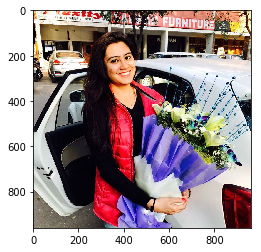

In [2]:
# Read in the image
image = cv2.imread('himani.jpg')
image_copy = np.copy(image)
# Convert to RGB
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

Figure(1440x720) AxesSubplot(0.125,0.125;0.227941x0.755) AxesSubplot(0.398529,0.125;0.227941x0.755) AxesSubplot(0.672059,0.125;0.227941x0.755)


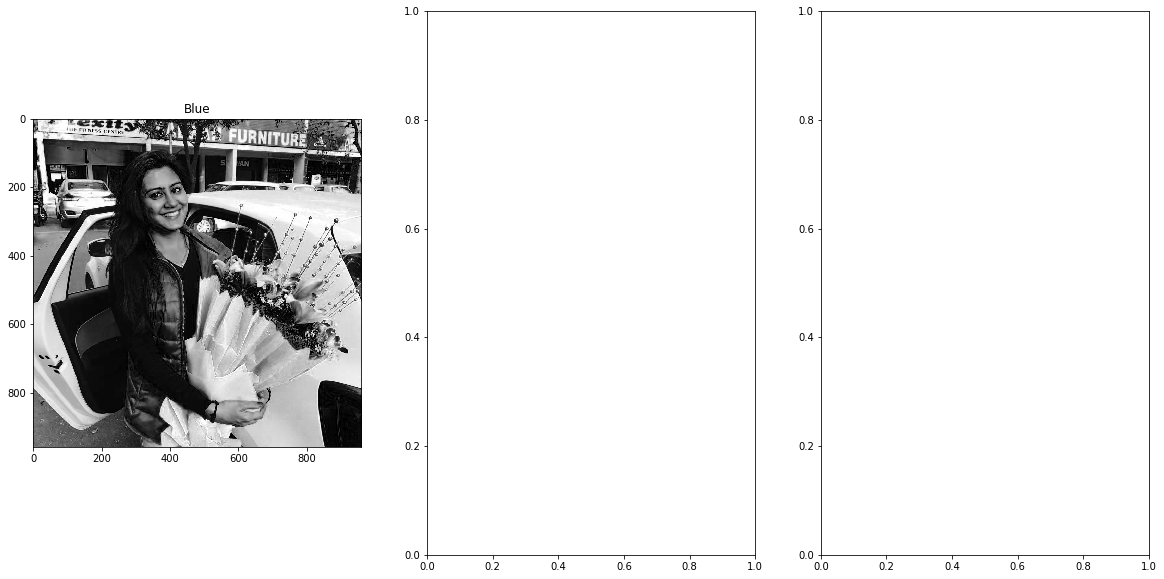

In [3]:
# RGB channels

r = image_copy[:, :, 0]
g = image_copy[:, :, 1]
b = image_copy[:, :, 2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
# print (f, ax1, ax2, ax3)
ax1.set_title('Red')
ax1.imshow(r, cmap='gray')

ax1.set_title('Green')
ax1.imshow(g, cmap='gray')

ax1.set_title('Blue')
ax1.imshow(b, cmap='gray')

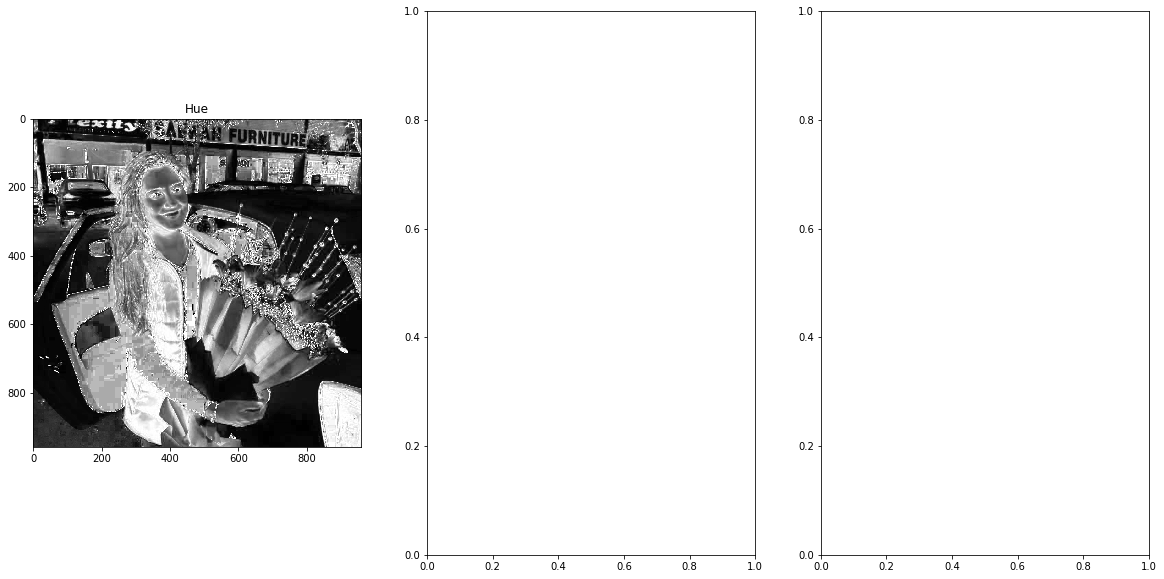

In [5]:
# Convert from RGB to HSV
hsv = cv2.cvtColor(image_copy, cv2.COLOR_RGB2HSV)

# HSV channels

h = hsv[:, :, 0]
s = hsv[:, :, 1]
v = hsv[:, :, 2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
# print (f, ax1, ax2, ax3)
ax1.set_title('Hue')
ax1.imshow(s, cmap='gray')

ax1.set_title('Saturation')
ax1.imshow(s, cmap='gray')

ax1.set_title('Value')
ax1.imshow(v, cmap='gray')

In [6]:
# Define our color selection criteria in RGB values
lower_red = np.array([150, 10, 10])
upper_red = np.array([255, 100, 100])

In [7]:
# Define our color selection criteria in HSC values
lower_hue = np.array([150, 0, 0])
upper_hue = np.array([180, 255, 255])

### Mask the Image

Text(0.5,1,'RGB selection')

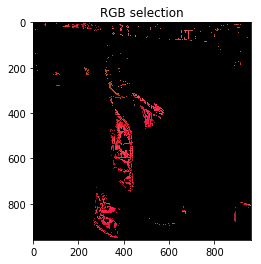

In [12]:
# RGB mask

# Define the masked area
mask_rgb = cv2.inRange(image_copy, lower_red, upper_red)

# Create a copy and mask the image
masked_image = np.copy(image_copy)
masked_image[mask_rgb == 0] = [0, 0, 0]

plt.imshow(masked_image)
plt.title('RGB selection')

Text(0.5,1,'HSV selection')

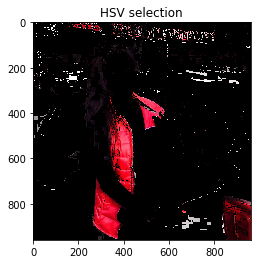

In [13]:
# HSV mask

mask_hsv = cv2.inRange(hsv, lower_hue, upper_hue)

masked_image = np.copy(image_copy)
masked_image[mask_hsv == 0] = [0, 0, 0]

plt.imshow(masked_image)
plt.title('HSV selection')

## Geometric Transformations

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [15]:
%matplotlib qt

ImportError: Matplotlib qt-based backends require an external PyQt4, PyQt5,
PySide or PySide2 package to be installed, but it was not found.

(240, 320, 3)


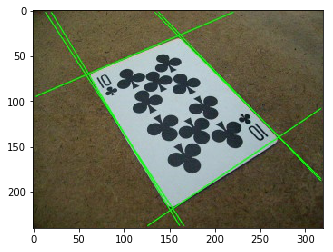

In [19]:
# Read in the image
image = cv2.imread('card-lines.jpg')
image_copy = np.copy(image)
# Convert to RGB
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)
print (image_copy.shape)

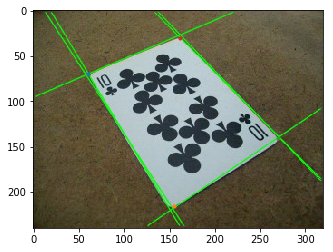

In [34]:
# find and select four points in source image
plt.imshow(image_copy)
plt.plot(60, 70, '.') # top left corner
plt.plot(155, 215, '.') # bottom left corner
plt.plot(270, 140, '.') # bottom right corner
plt.plot(162, 30, '.') # top right corner

## Define the geometric transform

In [ ]:
def warp(image):
    # source pts for image
    source_pts = np.float32(
    [[60, 70],
    [155, 215],
    [270, 140],
    [162, 30]])
    
    # Four warped coordinates
    warped_pts = np.float32(
    [])
    
    # Compute the persperctive transform, M
    M = cv2.getPerspectiveTransform(source_pts, warped_pts)
    
    # Can compute the inverse by swapping the input parameters
    M_inv = cv2.getPerspectiveTransform(warped_pts, source_pts)
    
    # get the image size (width, height)
    image_size = (image.shape[1], image_shape[0])
    
    # compute and return the warped image
    warped = cv2.warpPerspective(image, M, image_size, flags=cv2.INTER_LINEAR) # linear interpolation to fill missing points
    
    return warped